# Actividad 3 (Segmentación)
- Miranda Eugenia Colorado Arróniz A01737027
- Ciudad escogida: Hawaii

## Inciso a)
### K= 3, Variables = “review_scores_accuracy” y “number_of_reviews”

In [15]:
# Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [16]:
# Convertir el dataset en un dataframe
df= pd.read_csv("listings_filtrado.csv")
df

,id,listing_url,name,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,5269,https://www.airbnb.com/rooms/5269,Upcountry Hospitality in the 'Auwai Suite,"We are located on the ""sunny side"" of Waimea, ...",https://a0.muscache.com/pictures/5b52b72f-5a09...,7620,https://www.airbnb.com/users/show/7620,Lea & Pat,2009-02-09,"Waimea, HI",...,4.55,4.95,4.85,5.00,4.85,f,3,3,0,0
1,5387,https://www.airbnb.com/rooms/5387,Hale Koa Studio & 1 Bedroom Units!!,IN a Farm belt area with small commercial farm...,https://a0.muscache.com/pictures/1170713/dca6a...,7878,https://www.airbnb.com/users/show/7878,Edward,2009-02-13,"Captain Cook, HI",...,4.42,4.85,4.88,4.74,4.78,t,2,2,0,0
2,5480,https://www.airbnb.com/rooms/5480,Isle Of You Naturally Farm Retreat,We are located on a rural one lane road going ...,https://a0.muscache.com/pictures/75530989/8ed3...,8145,https://www.airbnb.com/users/show/8145,Normand,2009-02-18,"Pāhoa, HI",...,NaN,NaN,NaN,NaN,NaN,f,3,0,3,0
3,5532,https://www.airbnb.com/rooms/5532,2BR Waialua Beach Condo w/ Saltwater Pool & Sauna,NaN,https://a0.muscache.com/pictures/13743/134691a...,8279,https://www.airbnb.com/users/show/8279,Sarada,2009-02-20,"Waialua, HI",...,NaN,NaN,NaN,NaN,NaN,f,1,1,0,0
4,7888,https://www.airbnb.com/rooms/7888,Pineapple House 2 Bed 1 Bath with Loft Entire ...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,22083,https://www.airbnb.com/users/show/22083,Steven,2009-06-17,"Pahoa, HI",...,4.70,4.79,4.76,4.25,4.60,f,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36120,1369817596570977772,https://www.airbnb.com/rooms/1369817596570977772,1212 - 1B2OV The Whaler Resort,NaN,https://a0.muscache.com/pictures/prohost-api/H...,529290529,https://www.airbnb.com/users/show/529290529,The Whaler,2023-08-01,NaN,...,NaN,NaN,NaN,NaN,NaN,t,61,61,0,0
36121,1369824863578661367,https://www.airbnb.com/rooms/1369824863578661367,MRR: 9BR Luana Garden Villas,"When it is time to leave the resort, Honua Kai...",https://a0.muscache.com/pictures/prohost-api/H...,39073224,https://www.airbnb.com/users/show/39073224,Matthew William,2015-07-20,"Hawaii, United States",...,NaN,NaN,NaN,NaN,NaN,t,548,540,8,0
36122,1369841764486904562,https://www.airbnb.com/rooms/1369841764486904562,1-br MIL apartment in Wilhelmina,Wilhelmina Rise overlooks Kaimuki and Kahala. ...,https://a0.muscache.com/pictures/miso/Hosting-...,19796174,https://www.airbnb.com/users/show/19796174,Marina,2014-08-10,"Honolulu, HI",...,NaN,NaN,NaN,NaN,NaN,f,1,1,0,0
36123,1369865927101822261,https://www.airbnb.com/rooms/1369865927101822261,Camping Cheap,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,595524064,https://www.airbnb.com/users/show/595524064,Brandon,2024-08-11,"Kailua, HI",...,NaN,NaN,NaN,NaN,NaN,f,1,1,0,0


In [17]:
# Sustituir los valores nulos por los no nulos hacia adelante
df = df.fillna(method="ffill")

/var/folders/qg/1b6k32sd5_d2jr8q3bhrhg1r0000gn/T/ipykernel_36221/187457534.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method="ffill")


In [18]:
# Seleccionar las dos columnas (variables) para el clustering
X = df[['review_scores_accuracy', 'number_of_reviews']].values
X

array([[  4.88,  40.  ],
       [  4.69, 231.  ],
       [  4.69,   0.  ],
       ...,
       [  5.  ,   0.  ],
       [  5.  ,   0.  ],
       [  5.  ,   0.  ]], shape=(36125, 2))

In [19]:
# Aplicar K-means con 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [20]:
# Entrenar al modelo
etiquetas = kmeans.fit_predict(X)
etiquetas

array([0, 2, 0, ..., 0, 0, 0], shape=(36125,), dtype=int32)

In [21]:
#Obtenemos los centroides finales del modelo K-means
centroides = kmeans.cluster_centers_
centroides

array([[  4.77733451,  12.71884771],
       [  4.88534066, 361.29450549],
       [  4.86905686, 125.56374927]])

In [22]:
# Eliminar la columna 'cluster_2D' si ya existe
if 'cluster_2D' in df.columns:
    df.drop('cluster_2D', axis=1, inplace=True)

# Agregar la columna cluster_2D en el dataframe
df.insert(loc=1, column='cluster_2D', value=etiquetas)
df

,id,cluster_2D,listing_url,name,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,5269,0,https://www.airbnb.com/rooms/5269,Upcountry Hospitality in the 'Auwai Suite,"We are located on the ""sunny side"" of Waimea, ...",https://a0.muscache.com/pictures/5b52b72f-5a09...,7620,https://www.airbnb.com/users/show/7620,Lea & Pat,2009-02-09,...,4.55,4.95,4.85,5.00,4.85,f,3,3,0,0
1,5387,2,https://www.airbnb.com/rooms/5387,Hale Koa Studio & 1 Bedroom Units!!,IN a Farm belt area with small commercial farm...,https://a0.muscache.com/pictures/1170713/dca6a...,7878,https://www.airbnb.com/users/show/7878,Edward,2009-02-13,...,4.42,4.85,4.88,4.74,4.78,t,2,2,0,0
2,5480,0,https://www.airbnb.com/rooms/5480,Isle Of You Naturally Farm Retreat,We are located on a rural one lane road going ...,https://a0.muscache.com/pictures/75530989/8ed3...,8145,https://www.airbnb.com/users/show/8145,Normand,2009-02-18,...,4.42,4.85,4.88,4.74,4.78,f,3,0,3,0
3,5532,0,https://www.airbnb.com/rooms/5532,2BR Waialua Beach Condo w/ Saltwater Pool & Sauna,We are located on a rural one lane road going ...,https://a0.muscache.com/pictures/13743/134691a...,8279,https://www.airbnb.com/users/show/8279,Sarada,2009-02-20,...,4.42,4.85,4.88,4.74,4.78,f,1,1,0,0
4,7888,2,https://www.airbnb.com/rooms/7888,Pineapple House 2 Bed 1 Bath with Loft Entire ...,We are located on a rural one lane road going ...,https://a0.muscache.com/pictures/hosting/Hosti...,22083,https://www.airbnb.com/users/show/22083,Steven,2009-06-17,...,4.70,4.79,4.76,4.25,4.60,f,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36120,1369817596570977772,0,https://www.airbnb.com/rooms/1369817596570977772,1212 - 1B2OV The Whaler Resort,ONE BLOCK FROM THE BEACH AND ZOO. <br /><br />...,https://a0.muscache.com/pictures/prohost-api/H...,529290529,https://www.airbnb.com/users/show/529290529,The Whaler,2023-08-01,...,5.00,5.00,5.00,5.00,5.00,t,61,61,0,0
36121,1369824863578661367,0,https://www.airbnb.com/rooms/1369824863578661367,MRR: 9BR Luana Garden Villas,"When it is time to leave the resort, Honua Kai...",https://a0.muscache.com/pictures/prohost-api/H...,39073224,https://www.airbnb.com/users/show/39073224,Matthew William,2015-07-20,...,5.00,5.00,5.00,5.00,5.00,t,548,540,8,0
36122,1369841764486904562,0,https://www.airbnb.com/rooms/1369841764486904562,1-br MIL apartment in Wilhelmina,Wilhelmina Rise overlooks Kaimuki and Kahala. ...,https://a0.muscache.com/pictures/miso/Hosting-...,19796174,https://www.airbnb.com/users/show/19796174,Marina,2014-08-10,...,5.00,5.00,5.00,5.00,5.00,f,1,1,0,0
36123,1369865927101822261,0,https://www.airbnb.com/rooms/1369865927101822261,Camping Cheap,Wilhelmina Rise overlooks Kaimuki and Kahala. ...,https://a0.muscache.com/pictures/miso/Hosting-...,595524064,https://www.airbnb.com/users/show/595524064,Brandon,2024-08-11,...,5.00,5.00,5.00,5.00,5.00,f,1,1,0,0


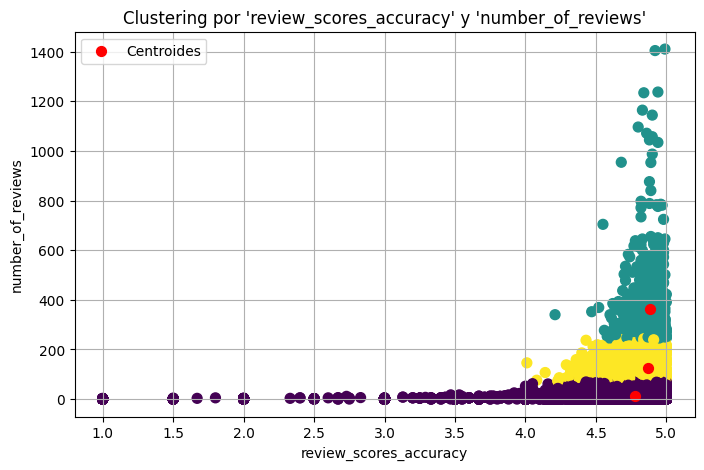

In [23]:
# Para visualizar en 2D, Se utiliza una variable como eje X y la otra variable como eje Y
plt.figure(figsize=(8, 5))
plt.scatter(X[:, 0], X[:, 1], c=etiquetas, cmap='viridis', s=50)
plt.scatter(centroides[:, 0], centroides[:, 1], c='red', marker='.', s=200, label='Centroides')

plt.title("Clustering por 'review_scores_accuracy' y 'number_of_reviews'")
plt.xlabel("review_scores_accuracy")
plt.ylabel("number_of_reviews")
plt.legend()
plt.grid(True)
plt.show()